# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                #importing the libraries 

# Importing the Dataset

In [2]:
df=pd.read_csv("50.csv")             #importing the dataset

In [3]:
df.head()                            #printing few rows from data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()     #descriptive statistics of dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()  #fetching the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.corr(numeric_only=True)  #printing pairwise correlation of columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.corr(numeric_only=True).Fare.sort_values(ascending=False) #calculate correlation of numeric columns and sort them

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

# Checking for Null Values

In [8]:
df.isnull().any() #checking for null values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.isnull().sum() #counting the number of missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.Name.nunique() #calculate the number of unique values in the "Name" column

891

In [11]:
df.Name.unique() #printing all the unique names

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [12]:
df.Name.value_counts() #counts the no. of time name is repeated

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

# Data Visualization

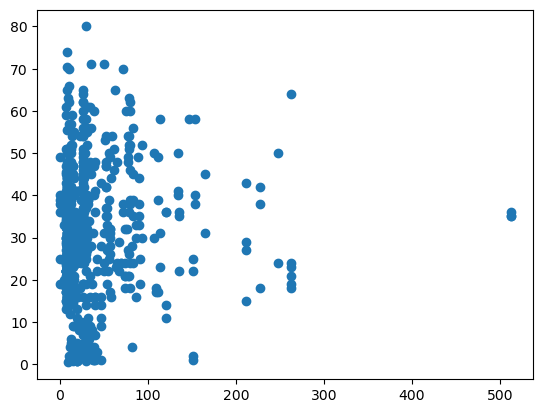

In [13]:
plt.scatter(df["Fare"],df["Age"]) #producing scatter graph between fare and age

<Axes: >

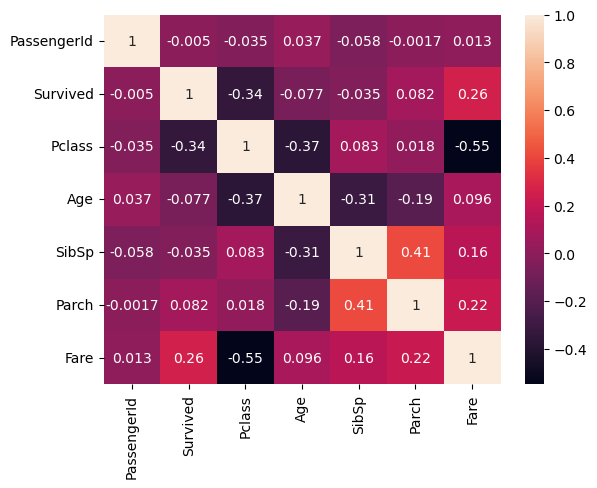

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True) #printing heatmap of all correaltion values

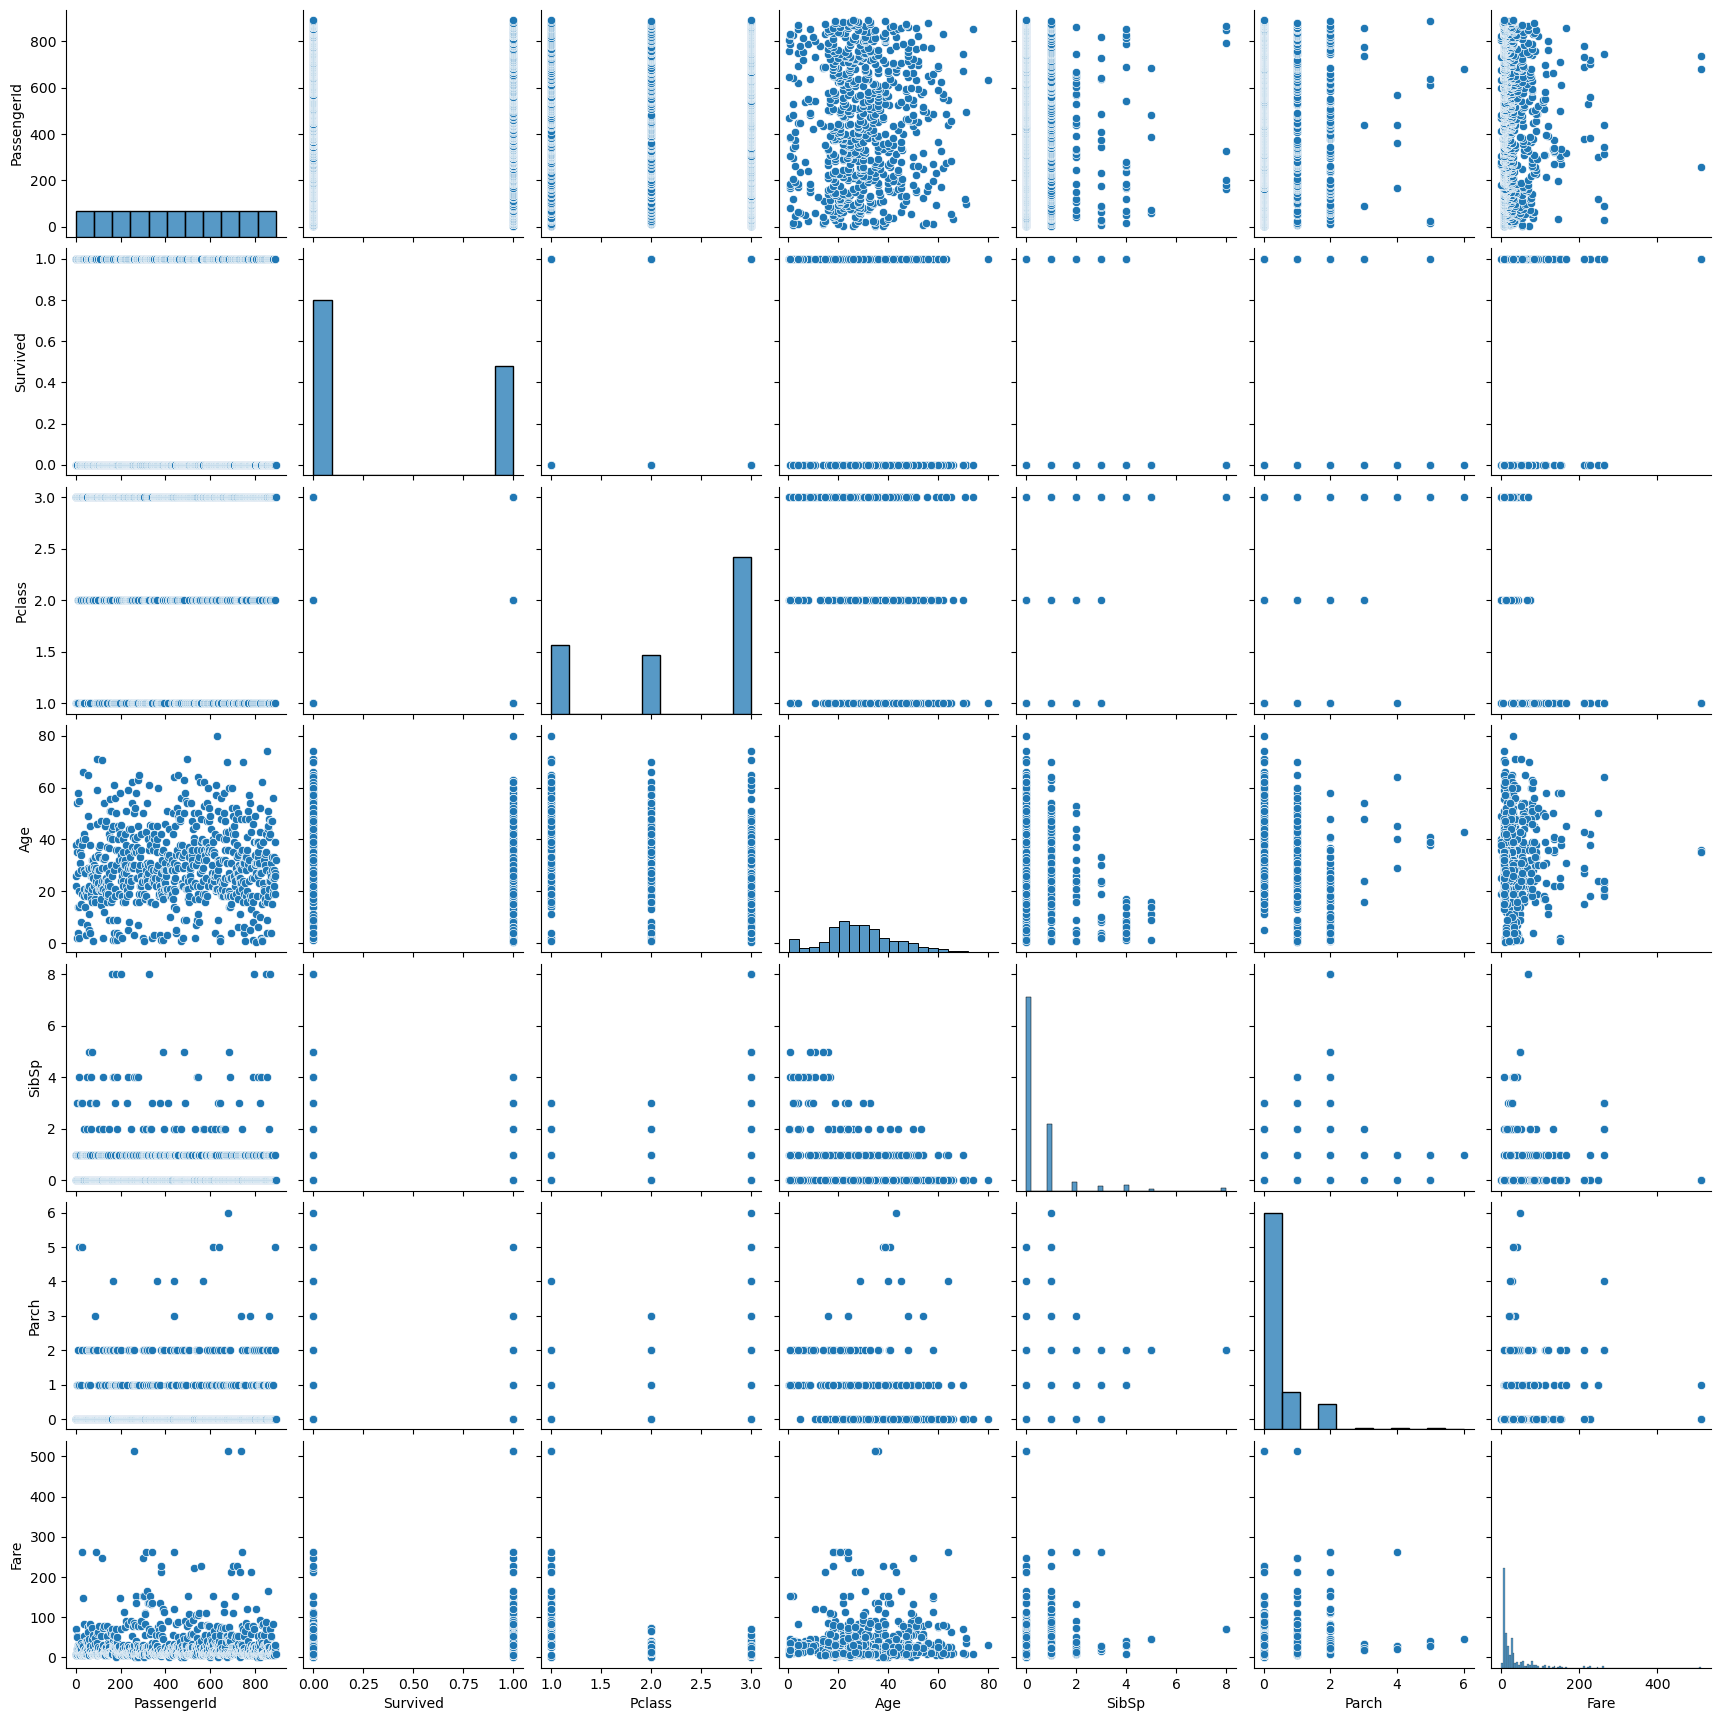

In [15]:
sns.pairplot(df) #pairwise relationship in a dataset

<Axes: xlabel='Name', ylabel='Age'>

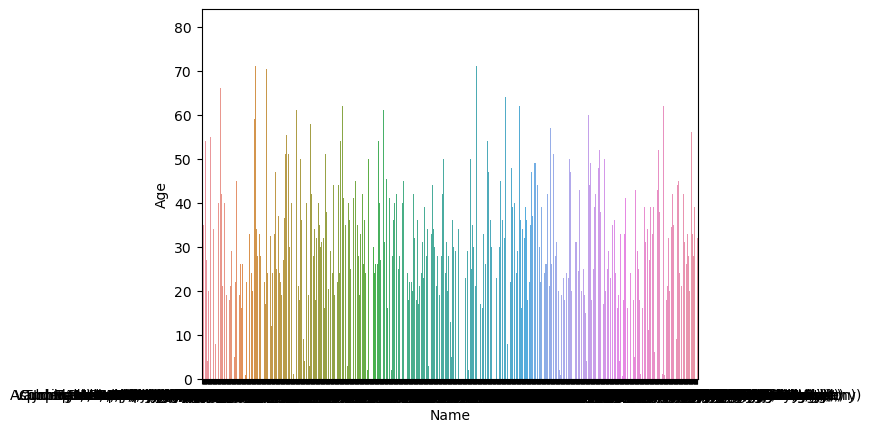

In [16]:
sns.barplot(x=df["Name"],y=df["Age"]) #printing barplot between name and age

# Outlier Detection

<Axes: >

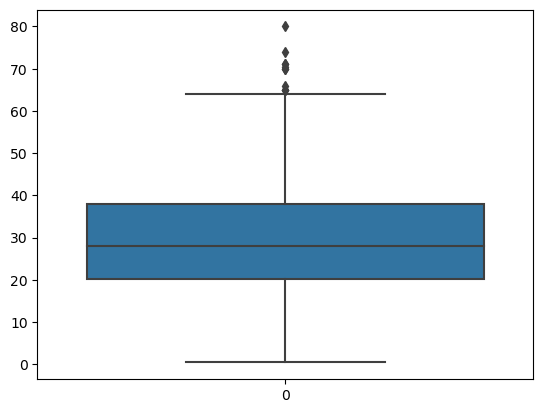

In [17]:
sns.boxplot(df["Age"]) #printing boxplot of age

<Axes: >

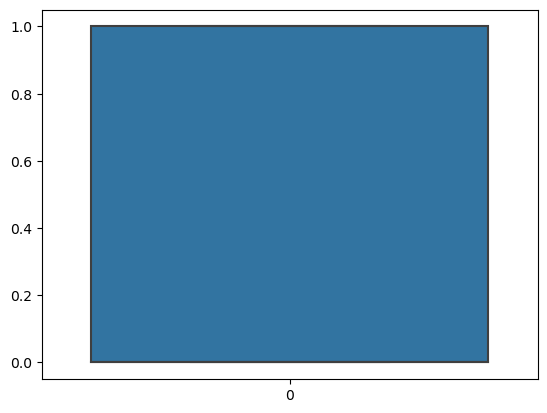

In [18]:
sns.boxplot(df["Survived"]) #printing boxplot of survived

# Spilliting Dependent and Independent variables

In [19]:
df.head() #printing few rows from data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
x=df.drop(columns=["Name","Cabin","Embarked","Ticket"],axis=1)
x.head()                #creating a new dataset x by dropping specific columns and printing first few rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [21]:
x.shape #determine the dimensions (number of rows and columns)

(891, 8)

In [22]:
type(x) #tells the type of the object that x refers to

pandas.core.frame.DataFrame

In [23]:
y=df["Fare"]
y.head()  #y selects fare coulmn and then displays first few rows 

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

# Perform Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()      #importing the LabelEncoder class from the sklearn.preprocessing and named as le

In [25]:
 x["Sex"]=le.fit_transform(x["Sex"]) #encode the values in the "Sex" column of the DataFrame

In [26]:
mapping=dict(zip(le.classes_,range(len(le.classes_)))) #maps original categorical labels to corresponding encoded integer values

In [27]:
x.head() #printing first few rows of dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


# Feature Scaling

In [ ]:
standardiation standard scaler  mean=0 and sd=1
min max scaler  0 to 1            #preprocessing numerical data in machine learning to bring data to a common scale

In [28]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()   #imported the MinMaxScaler class and created an instance of it named ms

In [29]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns) #scale the columns of a dataset x and create new dataset x_Scaled 

# Splitting Data into Train and Test 

In [30]:
from sklearn.model_selection import train_test_split #train_test_split function to split dataset into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(x_Scaled,y,test_size=0.2,random_state=0) 

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape) #print the dimensions of four data splits after train_test_split

(712, 8) (179, 8) (712,) (179,)
